<a href="https://colab.research.google.com/github/mithun-mith/Superstore_charts-/blob/main/Superstore_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!pip install pandas matplotlib


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sp


In [19]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')




In [23]:
df.head()


,Returned,Regional Manager,Row ID,Order ID,Order Date,Month Name,Ship Date,Ship Mode,Customer ID,Customer Name,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,No,Fred Suzuki,1,CA-2021-152156,11/8/2021,November,11/11/2021,Second,CG-12520,Claire Gute,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,No,Fred Suzuki,2,CA-2021-152156,11/8/2021,November,11/11/2021,Second,CG-12520,Claire Gute,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,No,Fred Suzuki,4,US-2020-108966,10/11/2020,October,10/18/2020,Standard,SO-20335,Sean O'Donnell,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,No,Fred Suzuki,5,US-2020-108966,10/11/2020,October,10/18/2020,Standard,SO-20335,Sean O'Donnell,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
4,No,Sadie Pawthorne,3,CA-2021-138688,6/12/2021,June,6/16/2021,Second,DV-13045,Darrin Van Huff,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Returned          12420 non-null  object 
 1   Regional Manager  12420 non-null  object 
 2   Row ID            12420 non-null  int64  
 3   Order ID          12420 non-null  object 
 4   Order Date        12420 non-null  object 
 5   Month Name        12420 non-null  object 
 6   Ship Date         12420 non-null  object 
 7   Ship Mode         12420 non-null  object 
 8   Customer ID       12420 non-null  object 
 9   Customer Name     12420 non-null  object 
 10  Segment           12420 non-null  object 
 11  Country/Region    12420 non-null  object 
 12  City              12420 non-null  object 
 13  State             12420 non-null  object 
 14  Postal Code       12409 non-null  float64
 15  Region            12420 non-null  object 
 16  Product ID        12420 non-null  object

In [25]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,12420.000000,12409.000000,12420.000000,12420.000000,12420.000000,12420.000000
mean,4983.194767,57417.516480,233.629369,3.785024,0.154403,28.995935
std,2888.299746,32749.815711,620.762848,2.231328,0.206124,246.506696
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2465.750000,24153.000000,17.904000,2.000000,0.000000,1.969800
50%,5095.000000,60623.000000,55.392000,3.000000,0.150000,9.072000
75%,7419.250000,90045.000000,212.680000,5.000000,0.200000,29.372000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
df.columns

Index(['Returned', 'Regional Manager', 'Row ID', 'Order ID', 'Order Date',
       'Month Name', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

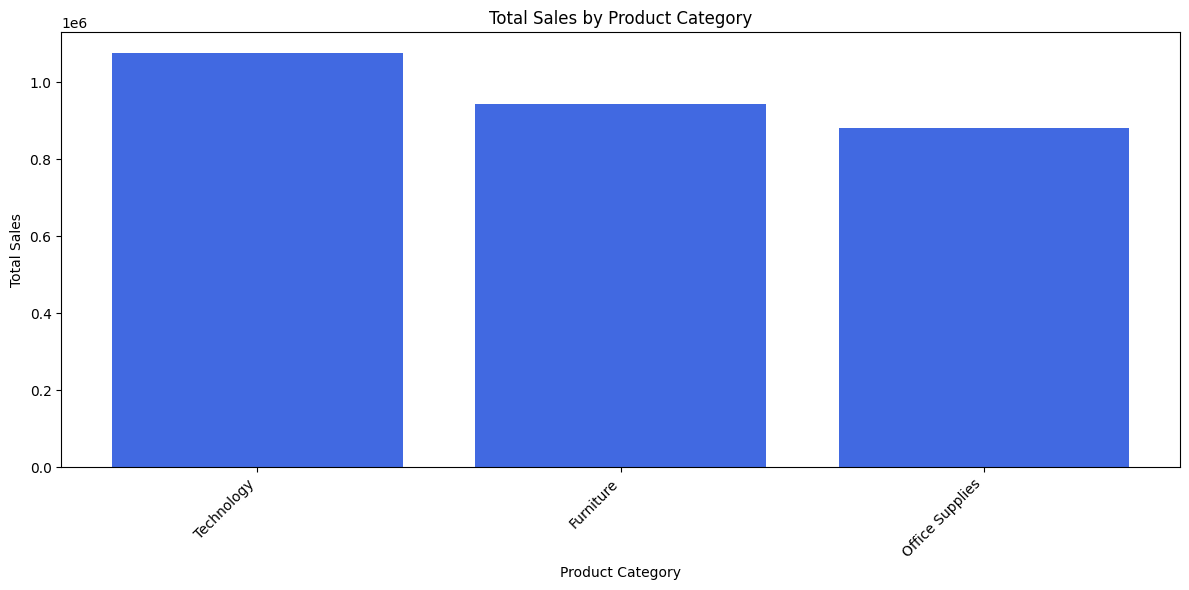

In [28]:
# Group the data by the "Category" column and calculate the total sales for each category
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

# Sort the categories by total sales in descending order
sorted_categories = category_sales.sort_values(by="Sales", ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_categories["Category"], sorted_categories["Sales"], color='royalblue')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


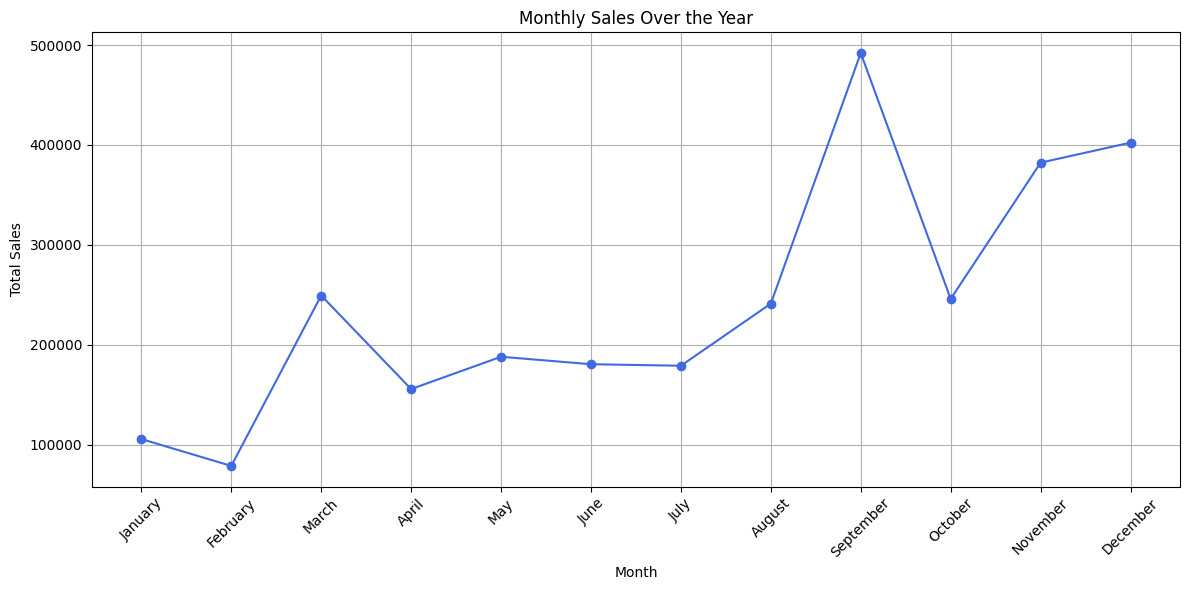

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'Month Name' and 'Sales' columns

# Group the data by 'Month Name' and sum the sales for each month
monthly_sales = df.groupby('Month Name')['Sales'].sum()

# Define the order of months for proper sorting in the line chart
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the 'monthly_sales' Series based on the defined month order
monthly_sales = monthly_sales.reindex(month_order)

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over the Year')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


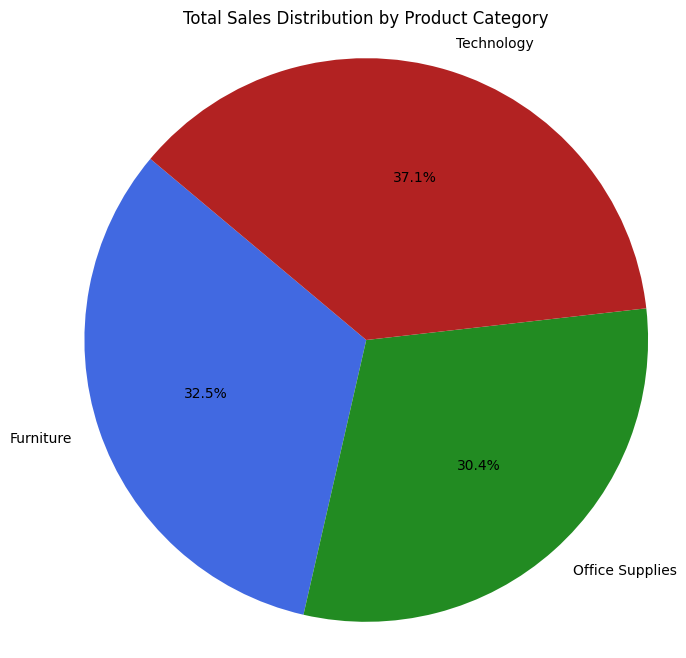

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'Category' and 'Sales' columns

# Group the data by 'Category' and calculate the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=['royalblue', 'forestgreen', 'firebrick'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Total Sales Distribution by Product Category')

# Show the pie chart
plt.show()


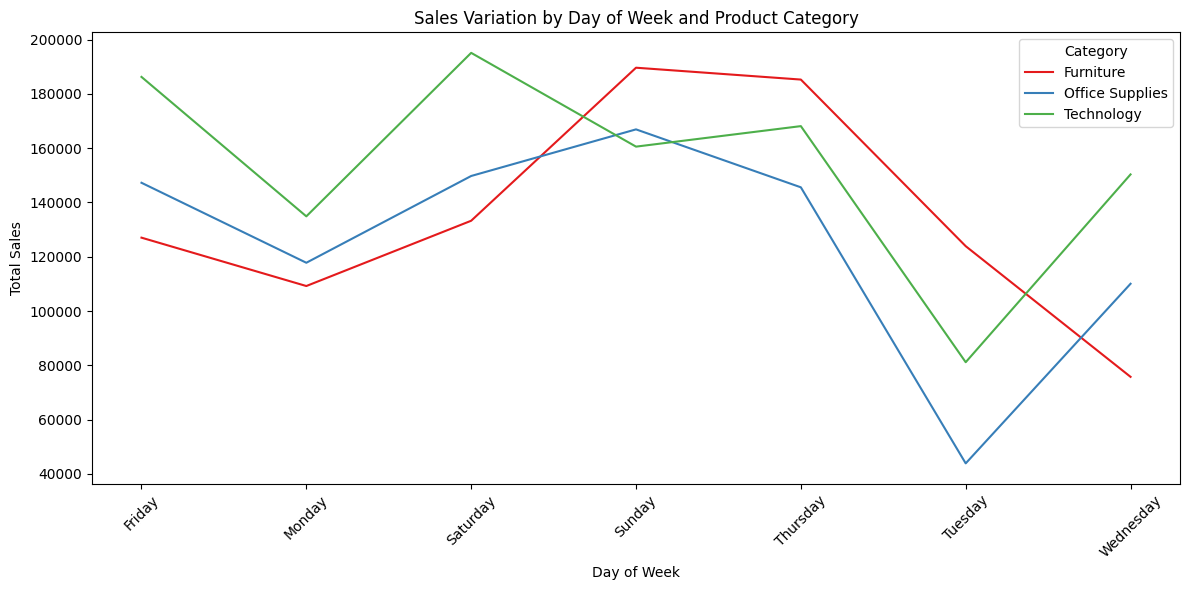

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For better styling

# Assuming you have a DataFrame 'df' with relevant columns

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the day of the week from the 'Order Date'
df['Day of Week'] = df['Order Date'].dt.day_name()

# Group the data by 'Category' and 'Day of Week' and calculate the total sales
category_day_sales = df.groupby(['Category', 'Day of Week'])['Sales'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day of Week', y='Sales', hue='Category', data=category_day_sales, palette='Set1')
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.title("Sales Variation by Day of Week and Product Category")

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Category', loc='upper right')
plt.show()


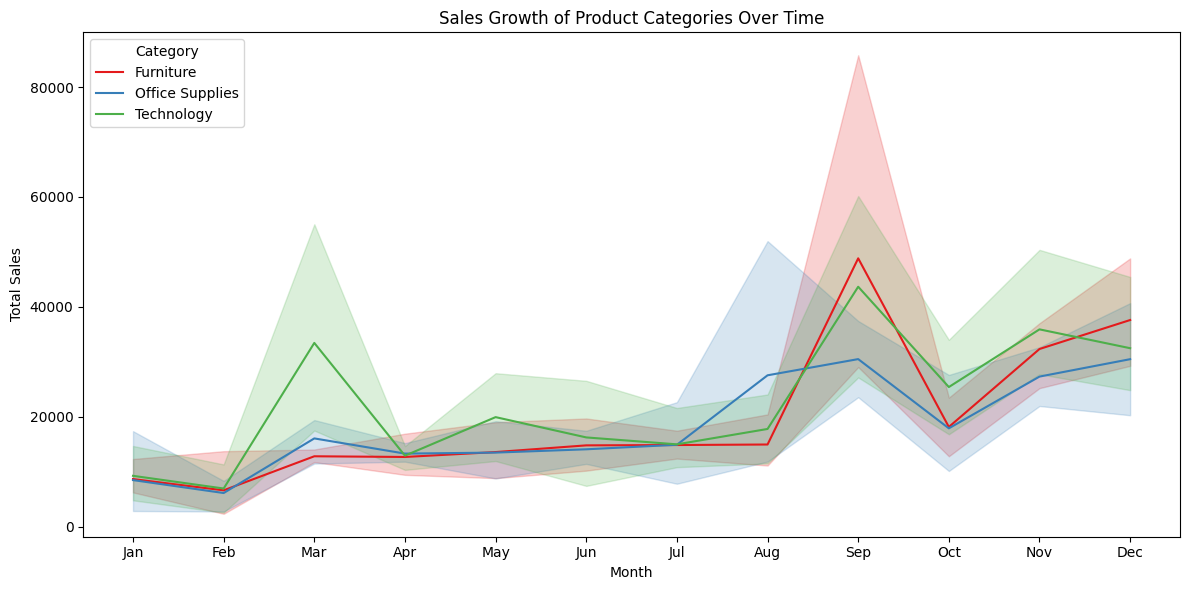

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with relevant columns

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year and month from the 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group the data by 'Category', 'Year', and 'Month' and calculate the total sales
category_monthly_sales = df.groupby(['Category', 'Year', 'Month'])['Sales'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Category', data=category_monthly_sales, palette='Set1')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Growth of Product Categories Over Time")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.legend(title='Category', loc='upper left')
plt.show()


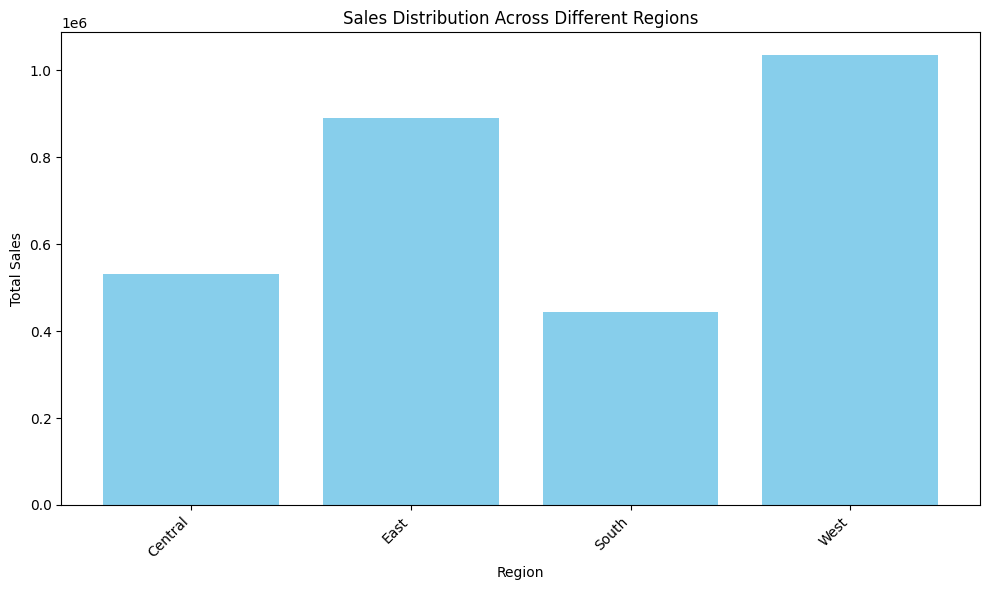

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns

# Group the data by 'Region' and calculate the total sales for each region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_sales['Region'], region_sales['Sales'], color='skyblue')
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Sales Distribution Across Different Regions")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

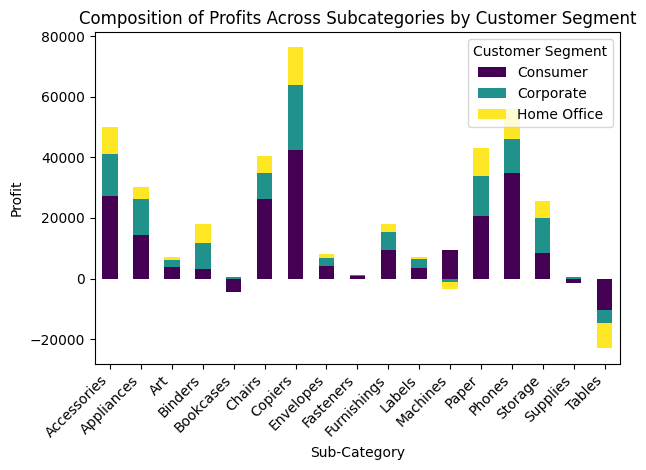

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns

# Pivot the data to create a DataFrame suitable for a stacked bar chart
pivot_df = df.pivot_table(index='Sub-Category', columns='Segment', values='Profit', aggfunc='sum', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.title("Composition of Profits Across Subcategories by Customer Segment")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(title="Customer Segment", loc='upper right')
plt.show()


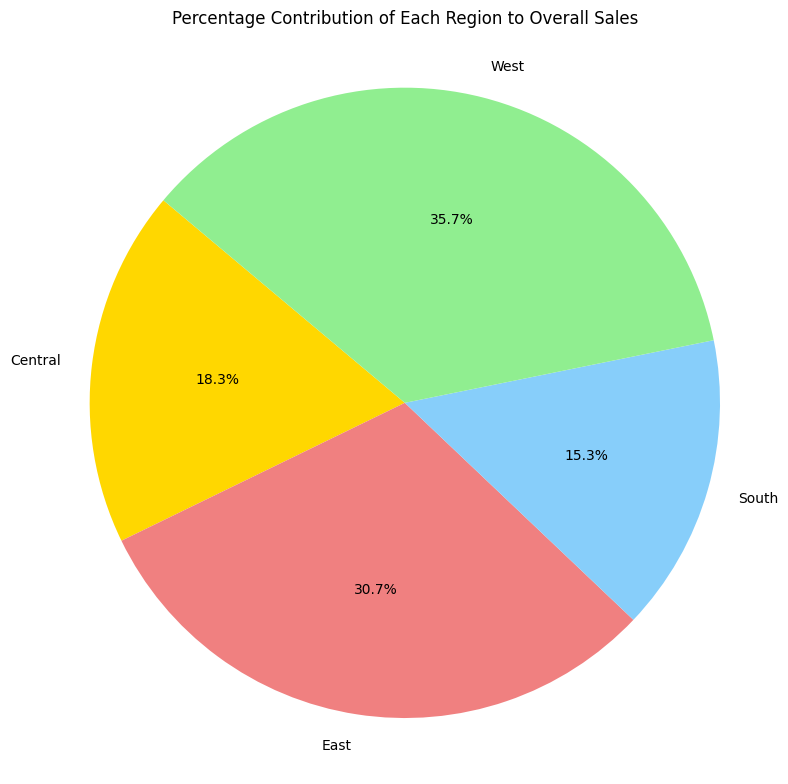

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns

# Group the data by the "Region" column and calculate the total sales for each region
region_sales = df.groupby("Region")["Sales"].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage Contribution of Each Region to Overall Sales")

# Show the plot
plt.tight_layout()
plt.show()


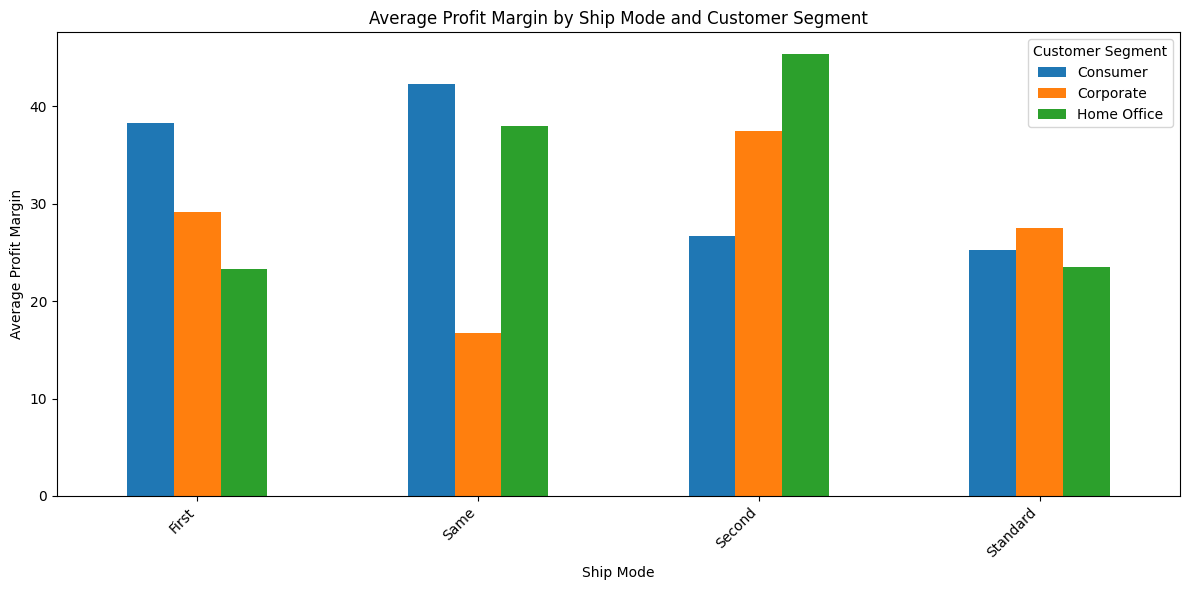

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns

# Group the data by "Ship Mode" and "Segment" columns and calculate the average profit margin for each combination
profit_margin = df.groupby(["Ship Mode", "Segment"])["Profit"].mean().unstack()

# Create a bar chart
ax = profit_margin.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Ship Mode")
plt.ylabel("Average Profit Margin")
plt.title("Average Profit Margin by Ship Mode and Customer Segment")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.legend(title="Customer Segment")
plt.show()


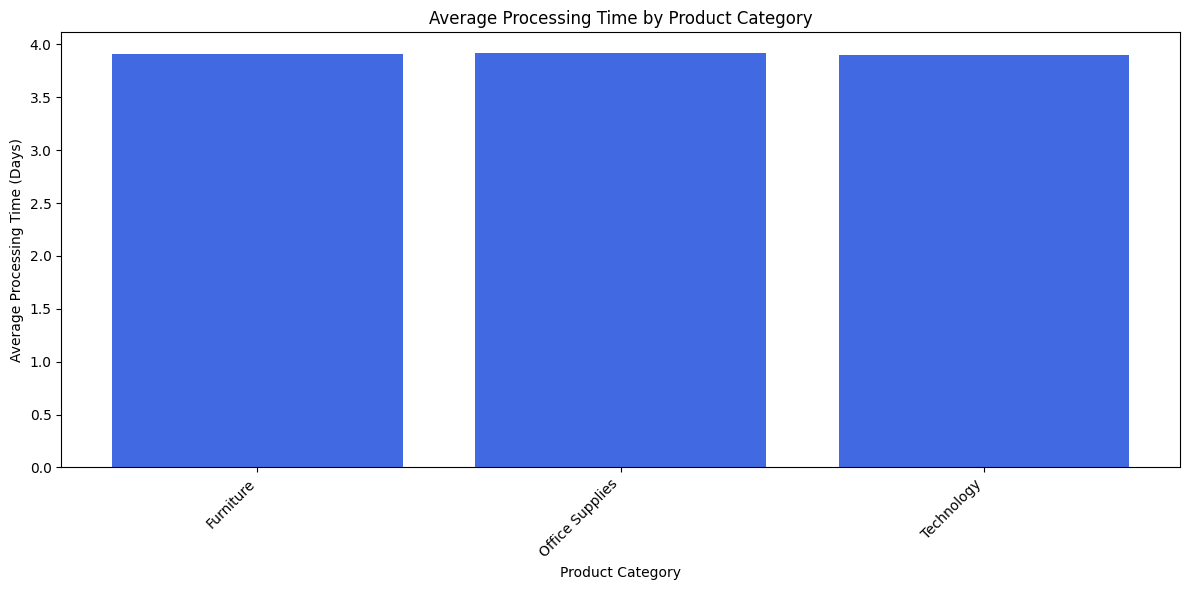

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns

# Calculate the processing time for each order
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group the data by "Category" and calculate the average processing time for each category
processing_time = df.groupby("Category")["Processing Time"].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(processing_time["Category"], processing_time["Processing Time"], color='royalblue')
plt.xlabel("Product Category")
plt.ylabel("Average Processing Time (Days)")
plt.title("Average Processing Time by Product Category")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


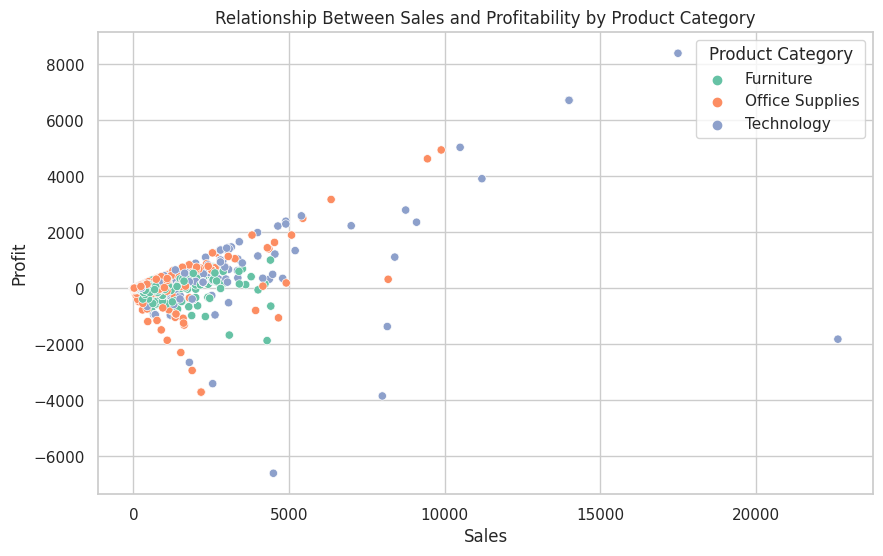

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame df with 'Category', 'Sales', and 'Profit' columns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sales", y="Profit", hue="Category", data=df, palette="Set2")
plt.title("Relationship Between Sales and Profitability by Product Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Product Category")
plt.show()






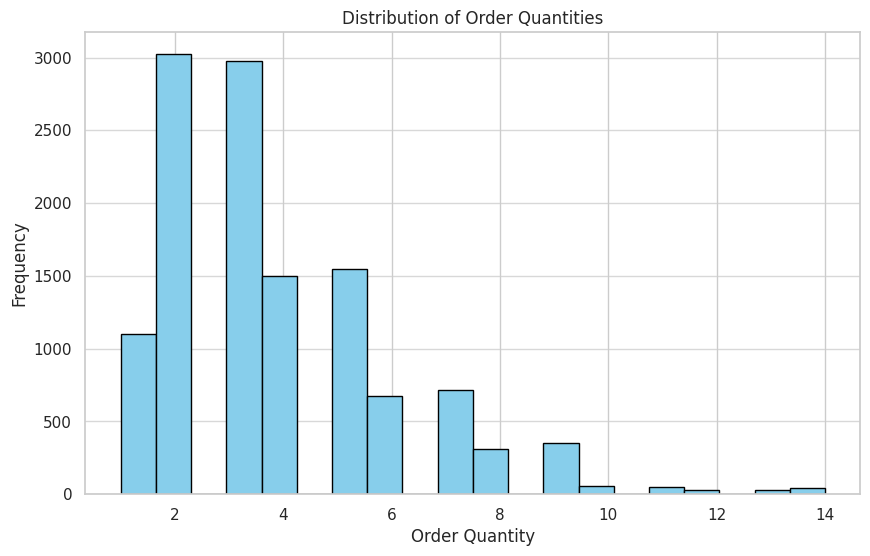

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with a 'Quantity' column
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.grid(axis='y', alpha=0.75)

plt.show()


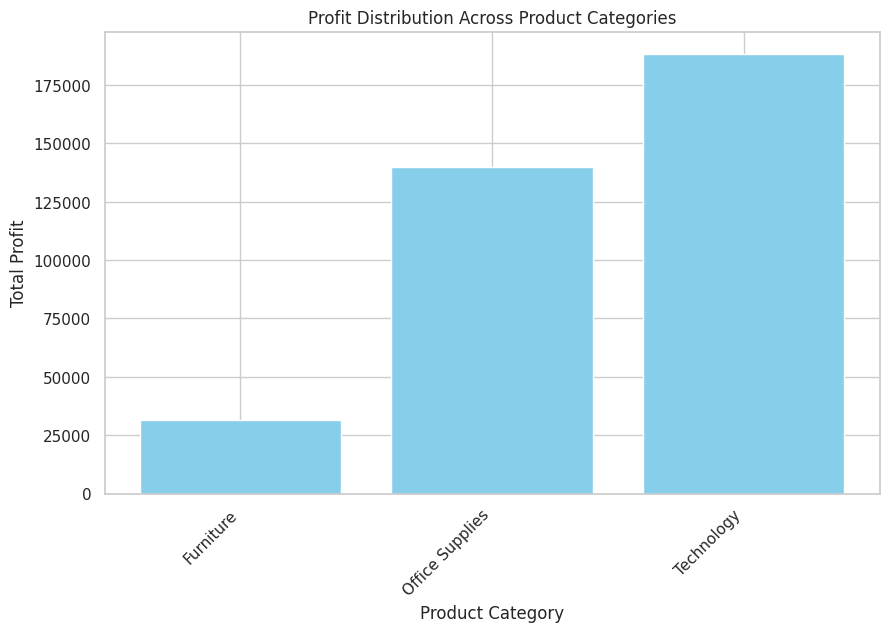

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with 'Category' and 'Profit' columns
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(category_profit['Category'], category_profit['Profit'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Profit Distribution Across Product Categories')
plt.xticks(rotation=45, ha='right')

plt.show()


In [48]:
df.columns

Index(['Returned', 'Regional Manager', 'Row ID', 'Order ID', 'Order Date',
       'Month Name', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'YearMonth', 'Day of Week', 'Year',
       'Month', 'Processing Time'],
      dtype='object')

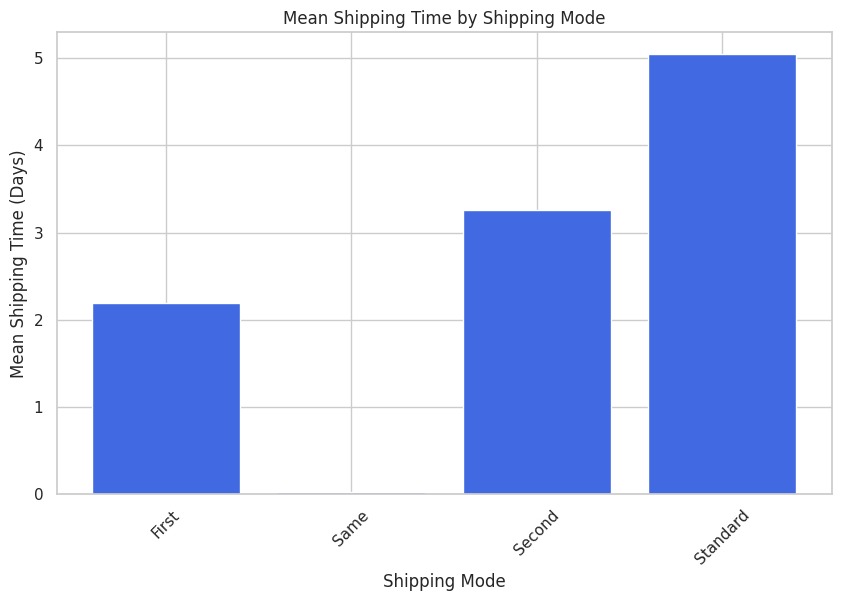

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with 'Ship Mode', 'Order Date', and 'Ship Date' columns

# Calculate shipping time as the difference between 'Ship Date' and 'Order Date' in days
df['Shipping Time'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days

# Calculate the mean shipping time for each shipping mode
shipping_time_means = df.groupby('Ship Mode')['Shipping Time'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(shipping_time_means['Ship Mode'], shipping_time_means['Shipping Time'], color='royalblue')
plt.xlabel('Shipping Mode')
plt.ylabel('Mean Shipping Time (Days)')
plt.title('Mean Shipping Time by Shipping Mode')
plt.xticks(rotation=45)

plt.show()
